<a href="https://colab.research.google.com/github/IST407-707/707-warm-up-assignment-2-RaghuVDs/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
file_path = '/content/drive/My Drive/SyracuseUniversity/AML/DataFile/2019_Yellow_Taxi_Trip_Data_Assig02.csv'
df = pd.read_csv(file_path)
df.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [ ]:
dimensions = df.shape
num_rows = dimensions[0]
num_columns = dimensions[1]

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 10000
Number of Columns: 18


#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [ ]:
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
summary_stats = df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()
print(summary_stats)

        fare_amount    tip_amount  tolls_amount  total_amount
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      15.106313      2.634494      0.623447     22.564659
std       13.954762      3.409800      6.437507     19.209255
min      -52.000000      0.000000     -6.120000    -65.920000
25%        7.000000      0.000000      0.000000     12.375000
50%       10.000000      2.000000      0.000000     16.300000
75%       16.000000      3.250000      0.000000     22.880000
max      176.000000     43.000000    612.000000    671.800000


#### Exercise 4

Count the number of NAs in each column.

In [ ]:
na_counts = df.isna().sum()
print(na_counts)

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

In [87]:
# Removing IDS, Dates and categorical data
columns_to_drop = ['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
                   'dolocationid', 'payment_type']
df = df.drop(columns_to_drop, axis=1)

# tried to run the code for the second time - as there are no columns available to drop, its showing error.

KeyError: "['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid', 'dolocationid', 'payment_type'] not found in axis"

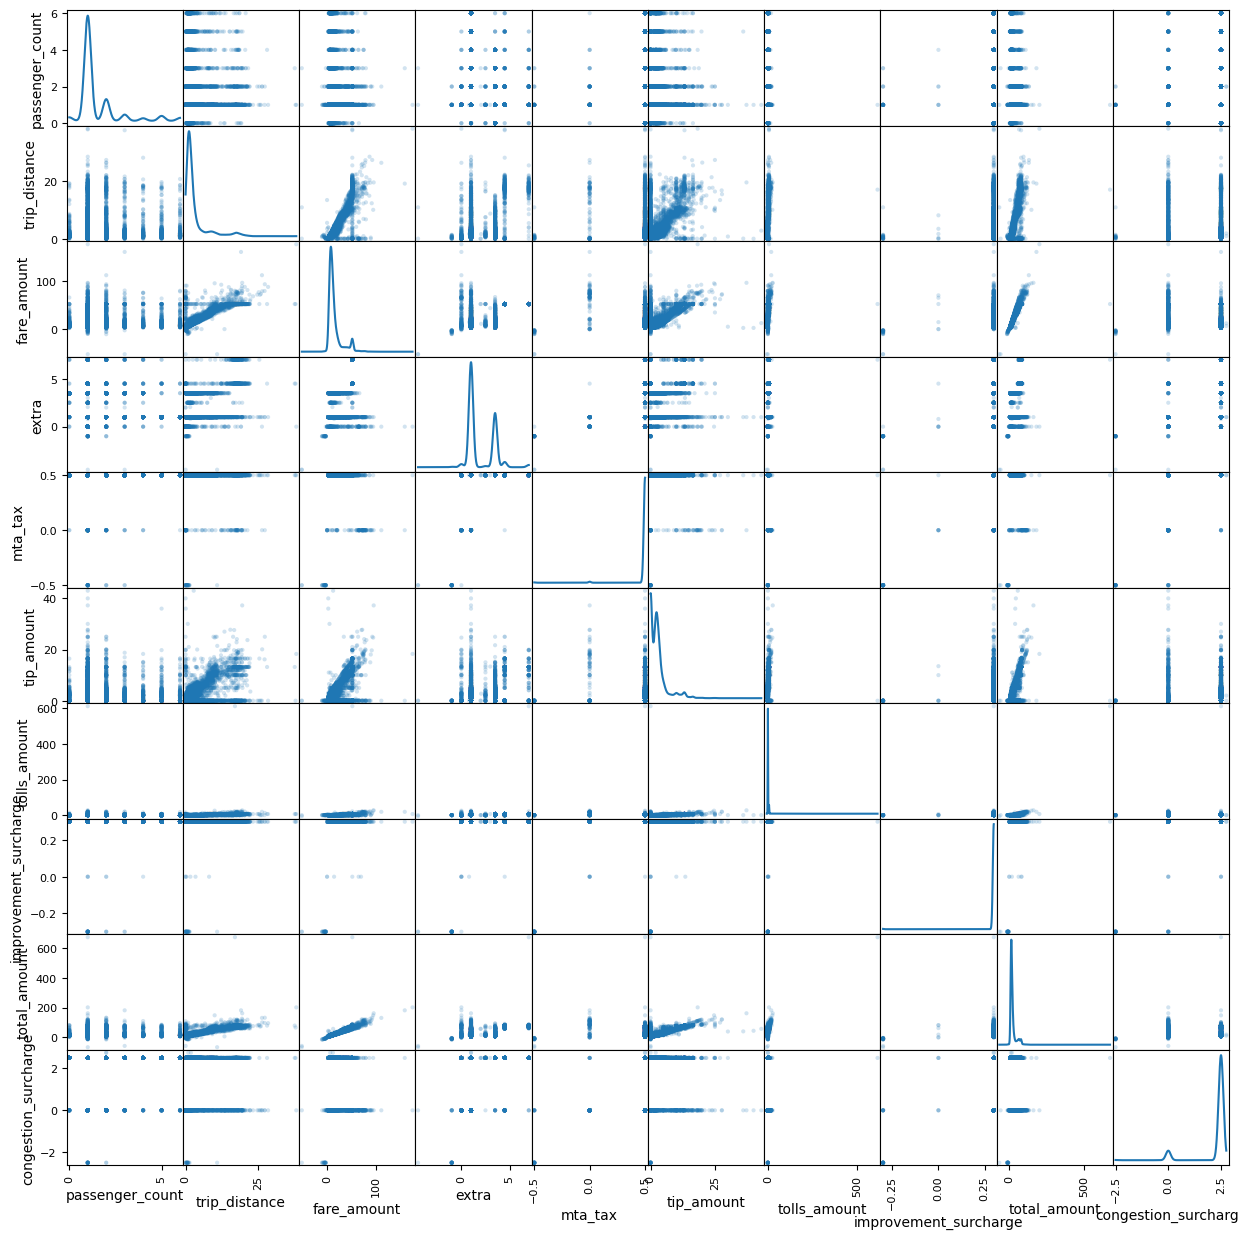

In [ ]:
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

In [ ]:
print(df['total_amount'].describe())

count    10000.000000
mean        22.564659
std         19.209255
min        -65.920000
25%         12.375000
50%         16.300000
75%         22.880000
max        671.800000
Name: total_amount, dtype: float64


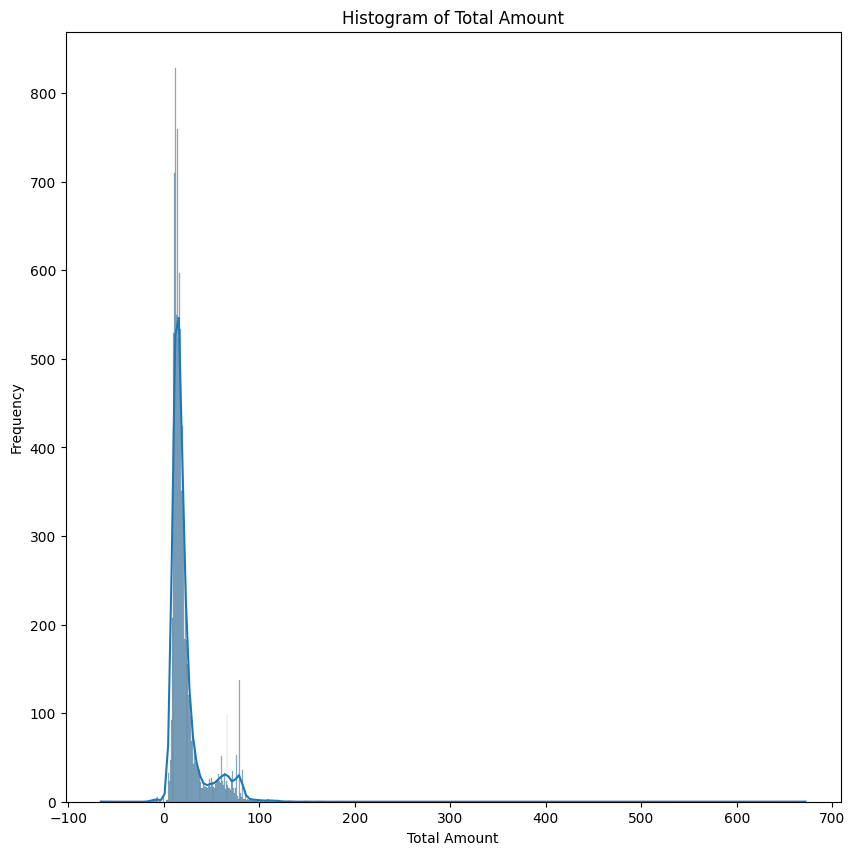

In [ ]:
# Histogram
plt.figure(figsize=(10,10))
sns.histplot(df['total_amount'], kde=True)
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

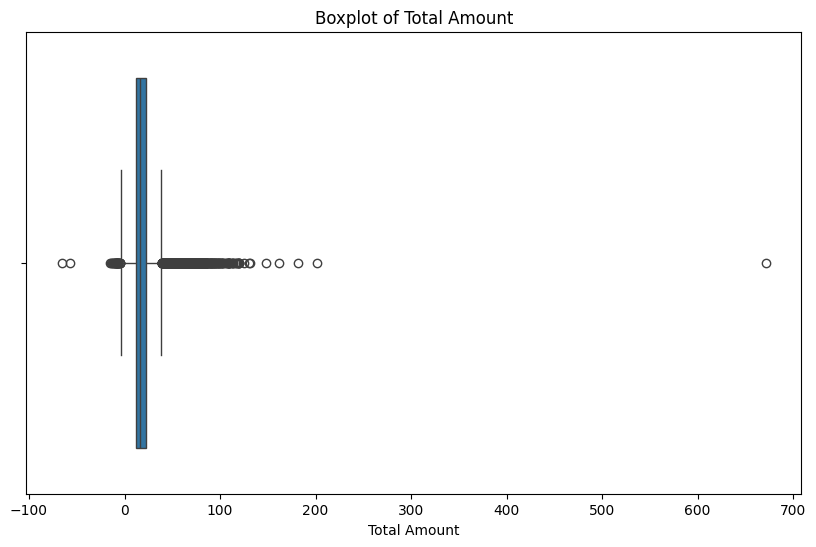

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

#### My Visualizing the Box Plot - we can clearly Say that there are Outliers in the data set

#### Exercise 7

Use a Linear regression and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features.

In [ ]:
X = df.drop(['fare_amount', 'total_amount', 'tip_amount'], axis=1)
y = df['fare_amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 338.6343567200956
Root Mean Squared Error (RMSE): 18.402020452116002
Mean Absolute Error (MAE): 3.809082652530678
R-squared: -0.833051069727557


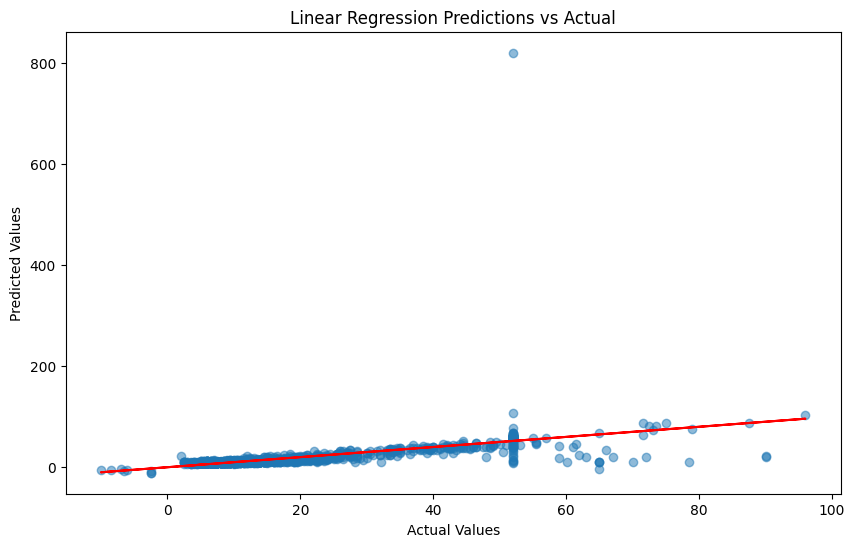

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(y_test, y_test, color='red')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?


In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)

In [ ]:
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

print(f"Decision Tree - Mean Squared Error: {tree_mse}")
print(f"Decision Tree - Root Mean Squared Error: {tree_rmse}")
print(f"Decision Tree - Mean Absolute Error: {tree_mae}")
print(f"Decision Tree - R-squared: {tree_r2}")

Decision Tree - Mean Squared Error: 31.232240009984533
Decision Tree - Root Mean Squared Error: 5.588581216192938
Decision Tree - Mean Absolute Error: 2.4780588675934605
Decision Tree - R-squared: 0.8309377361623964


#### Decision Tree has a much lower MSE, showing that the average squared difference between the predicted and actual values is smaller.

#### lower RMSE for the Decision Tree suggests that it has a better fit to the data compared to the Linear Regression model.

#### It again shows a lower MAE, indicating that its predictions are, on average, closer to the actual values.

#### Decision Tree has a positive R-squared close to 1, which means it explains a significant proportion of the variance in the target variable, unlike the Linear Regression model.